In [21]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [3]:
print(torch. __version__)

2.0.0


### 01 Define a graph

In [34]:


# a graph with 4 nodes

edge_list = torch.tensor([
    [0,0,0,1,2,2,3,3, 4,4,3,4], # source node
    [1,2,3,0,0,3,2,0,3,0,4,5] # Target nodes
], dtype=torch.long)

In [24]:
edge_list

tensor([[0, 0, 0, 1, 2, 2, 3, 3, 4, 4, 3],
        [1, 2, 3, 0, 0, 3, 2, 0, 3, 0, 4]])

### 02.  6 feastures for each node (4 *6 - # of nudes x # of features)

In [52]:
node_features  = torch.tensor([
                    [-8, 1, 5, 8, 2, -3], # features node 0
                    [-1, 0, 2, -3, 0, 1], #  " node 1
                    [1, -1, 0, -1, 2, 1], # " node 2"
                    [0,  1, 4, -2, 3, 4],  # node 3
                    [6,  0, 2, -6, 2, 0], # node 4
                    [-5,  1,  0, -1, -2, 1]
                        ], dtype = torch.long)

### 03.  weights for the features (one W for each edge)

In [53]:
edge_weight = torch.tensor([
    [35.], # W for node (0,1)
    [48.], # W for node (0,2)
    [12.], # W for (0,3)
    [10.], # W for (1,0)
    [70.], # W for (2,0)
    [5.], # W for (2,3)
    [15.], # W for (3,2)
    [8.], # W for (3,0)
    [23.], # (4,3)
    [8.], # (4,0)
    [2.], # (3,4)
    [1.],
], dtype = torch.long)

/var/folders/6_/n5_p9hgx2mj08njw5lqlvgww0000gn/T/ipykernel_6932/3637236476.py:1: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edge_weight = torch.tensor([


In [54]:
type(edge_weight)

torch.Tensor

### Make a data object to store all graph info above

In [55]:
data = Data(x=node_features, edge_index=edge_list, edge_attr = edge_weight)

In [56]:
print("Number of nodes: \n", data.num_nodes)

Number of nodes: 
 6


In [57]:
print("Num of edges: ", data.num_edges)

Num of edges:  12


In [58]:
print("# of features per node (len of feature vector):", data.num_node_features)

# of features per node (len of feature vector): 6


In [59]:
print("# of Weights (edge features):", data.num_edge_features, "\n")

# of Weights (edge features): 1 



## Plotting the graph 
***Note:** convert data to_networkx

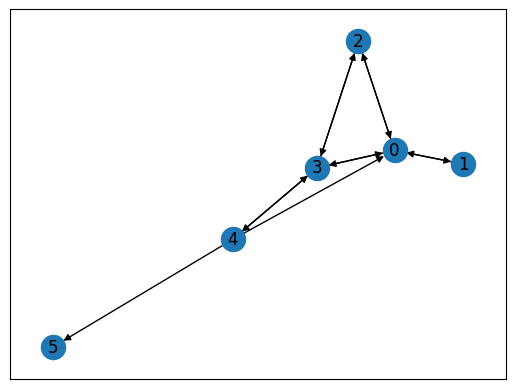

In [60]:
# plotting
G = to_networkx(data)
nx.draw_networkx(G)